In [1]:
import pickle
test = pickle.load(open('../corsika_dat_asum_threshold_100.pickle', 'rb'))
df = test['data']

In [2]:
df.head()

Particle ID   Azimuth  Altitude  First Interaction Height            X  \
0          101  3.160836  1.141193              36252.238281   541.135742   
1          101  3.160836  1.141193              36252.238281 -1329.029175   
2          101  3.160836  1.141193              36252.238281   -86.656761   
3          101  3.160836  1.141193              36252.238281   389.945282   
4          101  3.160836  1.141193              36252.238281   534.422852   

             Y    Energy Triggered Telescopes  \
0 -1267.192505  0.013761                  [1]   
1   260.096710  0.013761                  [1]   
2  -546.180481  0.013761                  [1]   
3   893.599609  0.013761                  [1]   
4   823.842346  0.013761                  [1]   

                                   Triggered Sectors  
0  {1: [113, 130, 176, 188, 309, 370, 419, 422, 4...  
1         {1: [2, 58, 122, 241, 292, 382, 427, 446]}  
2  {1: [335, 379, 381, 405, 406, 408, 444, 445, 4...  
3  {1: [50, 55, 92, 115, 141, 142, 146, 158, 199,...  
4   {1: [7, 11, 12, 40, 41, 62, 263, 292, 381, 444]}

In [3]:
import numpy as np
sector_trigger_times = np.zeros(474)

In [4]:
df_triggered = df.dropna()
n_sectors_triggered = df_triggered['Triggered Sectors'].map(lambda x: len(x[1]))

(array([ 0., 20., 37., 47., 55., 63., 79., 84., 87., 69., 82., 49., 68.,
        41., 37., 43., 31., 16., 26., 19., 11.,  7.,  5.,  5.,  2.,  2.,
         3.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  6

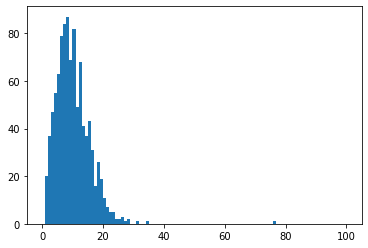

In [5]:
import matplotlib.pyplot as plt
plt.hist(n_sectors_triggered, bins=np.linspace(0, 100, 101))

In [6]:
triggered_sectors = df_triggered['Triggered Sectors'].map(lambda x: x[1])

In [7]:
for ts in triggered_sectors:
    for sector in ts:
        sector_trigger_times[sector] +=1

In [8]:
sector_trigger_times

array([20., 18., 20., 19., 18., 33., 23., 18., 17., 20., 20., 16., 23.,
       23., 17., 12., 11., 19., 19., 16., 12., 18., 18., 21., 13., 26.,
       26., 25., 19., 22., 19., 21., 23., 25., 21., 22., 22., 16., 16.,
       13., 24., 21., 30., 19., 12., 18., 18., 22., 20., 15., 24., 15.,
       17., 15., 19., 17., 18., 20., 20., 20., 28., 23., 23., 15., 34.,
       22., 17., 14., 18., 15., 18., 16., 19., 22., 17., 17., 12., 13.,
       15., 18., 17., 15., 12., 19., 20., 15., 15., 30., 17., 12., 16.,
       29., 21., 20., 24., 19., 14., 22., 24., 18., 17., 19., 32., 21.,
       18., 11., 21., 27., 18., 17., 23., 21., 14., 25., 13., 24., 19.,
       24., 20., 22., 23., 19., 19., 24., 14., 15., 30., 19., 18., 18.,
       20., 16., 21., 14., 17., 18., 18., 20., 17., 17., 15., 17., 26.,
       19., 14., 18., 18., 20., 21., 14., 21., 19., 21., 21., 18., 18.,
       24., 29., 22., 23., 18., 18., 14., 17., 21., 24., 29., 27., 16.,
       19., 21., 30., 20., 14., 27., 22., 23., 21., 22., 19., 27

Mean = 20.272151898734176
Sigma = 4.736493656976728
Scale = 474.0


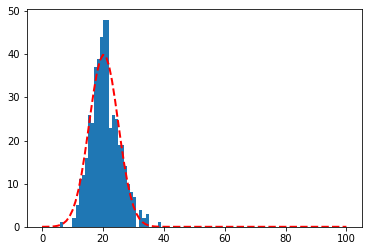

In [9]:
from scipy.stats import norm
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))
hist, bins, _ = plt.hist(sector_trigger_times, bins=np.linspace(0, 100, 101))

mean = np.mean(sector_trigger_times)
print(f'Mean = {mean}')
variance = np.var(sector_trigger_times)
sigma = np.sqrt(variance)
print(f'Sigma = {sigma}')
dx = bins[1] - bins[0]
scale = len(sector_trigger_times)*dx
print(f'Scale = {scale}')
bin_centers = 0.5 * (bins[1:]-bins[:-1])
plt.plot(bins, norm.pdf(bins, mean, sigma)*scale, 'r--', linewidth=2)


In [10]:
np.mean(sector_trigger_times)

20.272151898734176

In [11]:
import toml
config = toml.load('/home/mykhailo.dalchenko/code/iact_trigger_tools/prod5_no_nsb_asum_thr_10_1000_step_10_high_stat_effective_area.toml')

In [12]:
filelists = []
for _ in config['files']:
    filelists.append(_['filelist'])

In [13]:
from iact_trigger_tools.io.io import load_files

In [14]:
df.shape

(1000, 9)

In [15]:
weights = np.load('/fefs/aswg/workspace/mykhailo.dalchenko/trigger_studies/prod5_no_nsb_asum_thr_10_1000_step_10_high_stat/output/effective_area/trigger_probability_threshold_100.npz', allow_pickle=True)

In [16]:
df.head()

Particle ID   Azimuth  Altitude  First Interaction Height            X  \
0          101  3.160836  1.141193              36252.238281   541.135742   
1          101  3.160836  1.141193              36252.238281 -1329.029175   
2          101  3.160836  1.141193              36252.238281   -86.656761   
3          101  3.160836  1.141193              36252.238281   389.945282   
4          101  3.160836  1.141193              36252.238281   534.422852   

             Y    Energy Triggered Telescopes  \
0 -1267.192505  0.013761                  [1]   
1   260.096710  0.013761                  [1]   
2  -546.180481  0.013761                  [1]   
3   893.599609  0.013761                  [1]   
4   823.842346  0.013761                  [1]   

                                   Triggered Sectors  
0  {1: [113, 130, 176, 188, 309, 370, 419, 422, 4...  
1         {1: [2, 58, 122, 241, 292, 382, 427, 446]}  
2  {1: [335, 379, 381, 405, 406, 408, 444, 445, 4...  
3  {1: [50, 55, 92, 115, 141, 142, 146, 158, 199,...  
4   {1: [7, 11, 12, 40, 41, 62, 263, 292, 381, 444]}

In [17]:
metadata=test['metadata']

In [18]:
metadata

{'NSB RATE': '0.242',
 'ASUM THRESHOLD': 100,
 'ADC RATE': 1024000000,
 'ADC BINS': 75,
 'TELESCOPE POSITIONS': array([[-70.93, -52.07,  43.  ]], dtype=float32),
 'TELESCOPE POINTING': array([3.04875  , 1.2217305], dtype=float32)}

In [19]:
from iact_trigger_tools.analysis.effective_area import *
df['Delta'] = df.apply(calculate_delta, tel_al=metadata['TELESCOPE POINTING'][1],
                           tel_az=metadata['TELESCOPE POINTING'][0], axis=1)
df['Impact'] = df.apply(calculate_impact, tel_position=metadata['TELESCOPE POSITIONS'][0], axis=1)

In [20]:
df.tail()

Particle ID   Azimuth  Altitude  First Interaction Height            X  \
995          101  3.198404  1.332653              42799.136719  -519.933228   
996          101  3.198404  1.332653              42799.136719  1083.344238   
997          101  3.198404  1.332653              42799.136719 -1218.131226   
998          101  3.198404  1.332653              42799.136719   -36.820732   
999          101  3.198404  1.332653              42799.136719  -940.823486   

               Y    Energy Triggered Telescopes  \
995 -1064.925171  0.012613                  [1]   
996  1018.382263  0.012613                  [1]   
997  -175.770035  0.012613                  [1]   
998   270.912628  0.012613                  [1]   
999  -691.385315  0.012613                  [1]   

                                     Triggered Sectors     Delta       Impact  
995           {1: [108, 113, 227, 304, 326, 450, 469]}  0.118791  1106.036983  
996              {1: [5, 94, 140, 201, 226, 231, 438]}  0.118791  1540.291234  
997       {1: [31, 147, 152, 283, 288, 306, 331, 447]}  0.118791  1131.501240  
998                          {1: [184, 344, 351, 384]}  0.118791   323.107465  
999  {1: [1, 5, 6, 25, 38, 42, 43, 62, 98, 116, 437...  0.118791  1066.687936

In [21]:
weights['differential_trigger_probability']

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 4.54752160e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 1.74200854e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.68817204e-04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.25960448e-04, 7.58955677e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.71747212e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [22]:
weights['binning']

array([array([1.00000000e-02, 1.44543977e-02, 2.08929613e-02, 3.01995172e-02,
       4.36515832e-02, 6.30957344e-02, 9.12010839e-02, 1.31825674e-01,
       1.90546072e-01, 2.75422870e-01, 3.98107171e-01, 5.75439937e-01,
       8.31763771e-01, 1.20226443e+00, 1.73780083e+00, 2.51188643e+00,
       3.63078055e+00, 5.24807460e+00, 7.58577575e+00, 1.09647820e+01,
       1.58489319e+01, 2.29086765e+01, 3.31131121e+01, 4.78630092e+01,
       6.91830971e+01, 1.00000000e+02]),
       array([   0.        ,   66.66666667,  133.33333333,  200.        ,
        266.66666667,  333.33333333,  400.        ,  466.66666667,
        533.33333333,  600.        ,  666.66666667,  733.33333333,
        800.        ,  866.66666667,  933.33333333, 1000.        ]),
       array([0.        , 0.01666667, 0.03333333, 0.05      , 0.06666667,
       0.08333333, 0.1       , 0.11666667, 0.13333333, 0.15      ,
       0.16666667, 0.18333333, 0.2       , 0.21666667, 0.23333333,
       0.25      ])], dtype=object)

In [23]:
def calculate_trigger_probability(data, weights):
    binning = weights['binning']
    trigger_probability = weights['differential_trigger_probability']
    data['Energy bin'] = np.digitize(data['Energy'], binning[0]) - 1
    data['Energy bin'] = data['Energy bin'].where(data['Energy bin'] < len(binning[0]) - 1, len(binning[0]) - 2)
    data['Impact bin'] = np.digitize(data['Impact'], binning[1]) - 1
    data['Impact bin'] = data['Impact bin'].where(data['Impact bin'] < len(binning[1]) - 1, len(binning[1]) - 2)
    data['Delta bin'] = np.digitize(data['Delta'], binning[2]) - 1
    data['Delta bin'] = data['Delta bin'].where(data['Delta bin'] < len(binning[2]) - 2, len(binning[2]) - 2)
    data['Trigger Probability'] = trigger_probability[data['Energy bin'], data['Impact bin'], data['Delta bin']]
    return data
    

In [24]:
trigger_prob = weights['differential_trigger_probability']
trigger_prob.shape

(25, 15, 15)

In [25]:
binning = weights['binning']
binning.shape

(3,)

In [26]:
energy_binning = binning[0]
energy_binning.shape

(26,)

In [27]:
impact_binning = binning[1]
impact_binning.shape

(16,)

In [28]:
impact_binning

array([   0.        ,   66.66666667,  133.33333333,  200.        ,
        266.66666667,  333.33333333,  400.        ,  466.66666667,
        533.33333333,  600.        ,  666.66666667,  733.33333333,
        800.        ,  866.66666667,  933.33333333, 1000.        ])

In [29]:
delta_binning = binning[2]
delta_binning.shape

(16,)

In [30]:
delta_binning

array([0.        , 0.01666667, 0.03333333, 0.05      , 0.06666667,
       0.08333333, 0.1       , 0.11666667, 0.13333333, 0.15      ,
       0.16666667, 0.18333333, 0.2       , 0.21666667, 0.23333333,
       0.25      ])

In [31]:
df = calculate_trigger_probability(df, weights)
df.head()

Particle ID   Azimuth  Altitude  First Interaction Height            X  \
0          101  3.160836  1.141193              36252.238281   541.135742   
1          101  3.160836  1.141193              36252.238281 -1329.029175   
2          101  3.160836  1.141193              36252.238281   -86.656761   
3          101  3.160836  1.141193              36252.238281   389.945282   
4          101  3.160836  1.141193              36252.238281   534.422852   

             Y    Energy Triggered Telescopes  \
0 -1267.192505  0.013761                  [1]   
1   260.096710  0.013761                  [1]   
2  -546.180481  0.013761                  [1]   
3   893.599609  0.013761                  [1]   
4   823.842346  0.013761                  [1]   

                                   Triggered Sectors     Delta       Impact  \
0  {1: [113, 130, 176, 188, 309, 370, 419, 422, 4...  0.090974  1331.241807   
1         {1: [2, 58, 122, 241, 292, 382, 427, 446]}  0.090974  1203.942915   
2  {1: [335, 379, 381, 405, 406, 408, 444, 445, 4...  0.090974   495.403357   
3  {1: [50, 55, 92, 115, 141, 142, 146, 158, 199,...  0.090974  1025.484407   
4   {1: [7, 11, 12, 40, 41, 62, 263, 292, 381, 444]}  0.090974  1023.034382   

   Energy bin  Impact bin  Delta bin  Trigger Probability  
0           0          14          5             0.000035  
1           0          14          5             0.000035  
2           0           7          5             0.000066  
3           0          14          5             0.000035  
4           0          14          5             0.000035

In [32]:
df['Impact bin'] = df['Impact bin'].where(df['Impact bin'] < 15, 14)
df.head()

Particle ID   Azimuth  Altitude  First Interaction Height            X  \
0          101  3.160836  1.141193              36252.238281   541.135742   
1          101  3.160836  1.141193              36252.238281 -1329.029175   
2          101  3.160836  1.141193              36252.238281   -86.656761   
3          101  3.160836  1.141193              36252.238281   389.945282   
4          101  3.160836  1.141193              36252.238281   534.422852   

             Y    Energy Triggered Telescopes  \
0 -1267.192505  0.013761                  [1]   
1   260.096710  0.013761                  [1]   
2  -546.180481  0.013761                  [1]   
3   893.599609  0.013761                  [1]   
4   823.842346  0.013761                  [1]   

                                   Triggered Sectors     Delta       Impact  \
0  {1: [113, 130, 176, 188, 309, 370, 419, 422, 4...  0.090974  1331.241807   
1         {1: [2, 58, 122, 241, 292, 382, 427, 446]}  0.090974  1203.942915   
2  {1: [335, 379, 381, 405, 406, 408, 444, 445, 4...  0.090974   495.403357   
3  {1: [50, 55, 92, 115, 141, 142, 146, 158, 199,...  0.090974  1025.484407   
4   {1: [7, 11, 12, 40, 41, 62, 263, 292, 381, 444]}  0.090974  1023.034382   

   Energy bin  Impact bin  Delta bin  Trigger Probability  
0           0          14          5             0.000035  
1           0          14          5             0.000035  
2           0           7          5             0.000066  
3           0          14          5             0.000035  
4           0          14          5             0.000035

In [33]:
def eff_area_from_trigger_probability(trig_prob_file):
    # Calculate the effective area as a function of energy
    with np.load(trig_prob_file, allow_pickle=True) as weights:
        binning = weights['binning']
        trigger_probability = weights['differential_trigger_probability']
        trigger_probability_high = weights['differential_trigger_probability_high']
        trigger_probability_low = weights['differential_trigger_probability_low']
        r = 0.5 * (binning[1][1:] + binning[1][:-1]) # get impact parameter bin centers
        dr = (binning[1][1:] - binning[1][:-1]) # get impact parameter bin widths
        rdr = r * dr
        omega_edges = 2 * np.pi * (1 - np.cos(binning[2]))
        domega = (omega_edges[1:] - omega_edges[:-1]).reshape([1, 1, -1])
        rdr = rdr.reshape([1, -1, 1])
        eff_area = 2 * np.pi * np.sum(trigger_probability * rdr * domega, axis=(1, 2))
        eff_area_err_low = 2 * np.pi * np.sqrt(np.nansum(((trigger_probability - trigger_probability_low) * rdr * domega)**2, axis=(1, 2)))
        eff_area_err_high = 2 * np.pi * np.sqrt(np.nansum(((trigger_probability_high - trigger_probability) * rdr * domega)**2, axis=(1, 2)))
        return eff_area, eff_area_err_low, eff_area_err_high, binning[0]

In [34]:
test_file = '/fefs/aswg/workspace/mykhailo.dalchenko/trigger_studies/prod5_no_nsb_asum_thr_10_1000_step_10_high_stat/output/effective_area/trigger_probability_threshold_1000.npz'
ea, eal, eah, e_binning = eff_area_from_trigger_probability(test_file)
print('Effective area\n', ea)
print('Effective area low\n', eal)
print('Effective area high\n', eah)

Effective area
 [0.00000000e+00 3.28070654e-01 1.19948057e+00 6.84796322e+00
 1.54425553e+01 3.02061814e+01 6.84616434e+01 1.23569388e+02
 2.92499387e+02 3.97562470e+02 7.36714651e+02 1.10326001e+03
 1.14404335e+03 1.62203073e+03 1.92672313e+03 2.76352508e+03
 3.83974401e+03 3.92175825e+03 4.35189609e+03 4.33212857e+03
 8.10897187e+03 7.73020071e+03 1.08469075e+04 1.27413689e+04
 8.55380857e+03]
Effective area low
 [0.00000000e+00 1.91816211e-01 4.62918199e-01 1.28001588e+00
 2.40620384e+00 4.12669676e+00 7.51689921e+00 1.23329130e+01
 2.32851244e+01 3.22351761e+01 5.27735733e+01 7.54173604e+01
 8.71663216e+01 1.38695651e+02 2.01771889e+02 2.38284446e+02
 4.02429434e+02 4.89635989e+02 5.95918683e+02 6.53574455e+02
 1.09447735e+03 1.11220835e+03 2.00365866e+03 2.07213797e+03
 2.78468544e+03]
Effective area high
 [0.00000000e+00 2.31987656e-01 6.36459562e-01 1.60571645e+00
 3.42242610e+00 6.48348216e+00 1.40102840e+01 2.68085802e+01
 6.01458952e+01 8.38832403e+01 1.58357844e+02 2.3031514

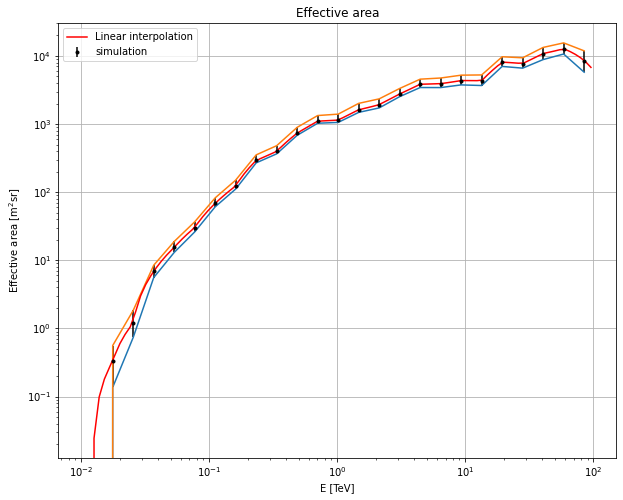

In [35]:
from scipy.interpolate import interp1d


fig = plt.figure(figsize=(10,8))
bin_centers = 0.5 * (energy_binning[1:] + energy_binning[:-1])
plt.errorbar(bin_centers, ea,
             yerr=[eal, eah],
             fmt='.', color='black', label="simulation")
plt.plot(bin_centers, ea-eal)
plt.plot(bin_centers, ea+eah)


eff_area_interpolated_1 = interp1d(bin_centers, ea, fill_value='extrapolate')
eff_area_interpolated_2 = interp1d(bin_centers, ea, kind='quadratic', fill_value='extrapolate')
eff_area_interpolated_3 = interp1d(bin_centers, ea, kind='cubic', fill_value='extrapolate')
energy_smooth = np.logspace(-2, 2, 100)
energy_centers_smooth = 0.5 * (energy_smooth[1:] + energy_smooth[:-1])
plt.plot(energy_centers_smooth, eff_area_interpolated_1(energy_centers_smooth), 'r-', label="Linear interpolation")
#plt.plot(energy_centers_smooth, eff_area_interpolated_2(energy_centers_smooth), 'g-', label="Quadratic interpolation")
#plt.plot(energy_centers_smooth, eff_area_interpolated_3(energy_centers_smooth), 'b-', label="Cubic interpolation")

plt.title('Effective area')
plt.ylabel('Effective area [m$^2$sr]')
plt.xlabel('E [TeV]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()

In [36]:
from scipy.integrate import quad

def differential_rate(energy, func):
    result = 0.096*pow(energy, -2.7)*func(energy)
    if result < 0: result = 0
    return result

def rate_from_diff_trig_prob(probfile):
    ea, eal, eah, energy_binning = eff_area_from_trigger_probability(probfile)
    bin_centers = 0.5 * (energy_binning[1:] + energy_binning[:-1])
    eff_area_interpolated = interp1d(bin_centers, ea, fill_value='extrapolate')
    eff_area_interpolated_low = interp1d(bin_centers, ea-eal, fill_value='extrapolate')
    eff_area_interpolated_high = interp1d(bin_centers, ea+eah, fill_value='extrapolate')
    rate, err = quad(differential_rate, 0.01, 100, args=(eff_area_interpolated), limit=100)
    rate_low, err = quad(differential_rate, 0.01, 100, args=(eff_area_interpolated_low), limit=100)
    rate_high, err = quad(differential_rate, 0.01, 100, args=(eff_area_interpolated_high), limit=100)
    return rate, rate_low, rate_high
    
rate, rate_low, rate_high = rate_from_diff_trig_prob('/fefs/aswg/workspace/mykhailo.dalchenko/trigger_studies/prod5_no_nsb_asum_thr_10_1000_step_10_high_stat/output/effective_area/trigger_probability_threshold_100.npz')
print(rate)

/home/mykhailo.dalchenko/venv-python3/lib/python3.7/site-packages/ipykernel_launcher.py:14: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  
/home/mykhailo.dalchenko/venv-python3/lib/python3.7/site-packages/ipykernel_launcher.py:15: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval

16851.566720013365


/home/mykhailo.dalchenko/venv-python3/lib/python3.7/site-packages/ipykernel_launcher.py:16: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  app.launch_new_instance()


In [37]:
import glob
data = []
for filename in glob.glob('/fefs/aswg/workspace/mykhailo.dalchenko/trigger_studies/prod5_no_nsb_asum_thr_10_1000_step_10_high_stat/output/effective_area/*.npz'):
    threshold = int(filename.split('_')[-1][:-4])
    rate, rate_low, rate_high = rate_from_diff_trig_prob(filename)
    data.append({'threshold': threshold, 'rate': rate, 'rate_low': rate_low, 'rate_high': rate_high})
df_rates = pd.DataFrame.from_records(data)
df_rates.head()

/home/mykhailo.dalchenko/venv-python3/lib/python3.7/site-packages/ipykernel_launcher.py:14: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  
/home/mykhailo.dalchenko/venv-python3/lib/python3.7/site-packages/ipykernel_launcher.py:15: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval

threshold         rate     rate_low    rate_high
0        340  3683.276629  3428.644280  4330.510026
1        720  1603.905065  1446.996852  1942.371876
2        840  1284.189109  1152.518550  1568.701291
3        830  1312.528306  1179.284868  1600.004610
4        260  5074.103127  4762.601909  5903.597867

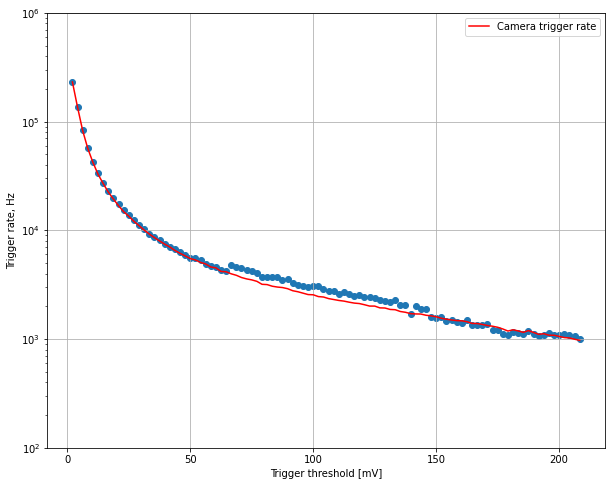

In [38]:
df_rates=df_rates.sort_values('threshold')
fig = plt.figure(figsize=(10,8))
plt.plot(df_rates['threshold']/4.8, df_rates['rate'], 'r-', label="Camera trigger rate")

##########
thresholds = []
rates = []
points = []
for i in sorted(glob.glob(f'/fefs/aswg/workspace/mykhailo.dalchenko/trigger_studies/prod5_no_nsb_asum_thr_10_1000_step_10_high_stat/output/effective_area//rate_threshold*.txt')):
    with open(i, 'r') as f:
        vals = f.readline().split(' ')
        thresholds.append(int(vals[1][:-1])/4.8)
        rates.append(float(vals[4]))
        points.append((int(vals[1][:-1])/4.8, float(vals[4])))

#plt.plot(thresholds, rates, 'bo', linestyle='None', markersize = 3.0)
plt.scatter(*zip(*points))
#########
plt.xlabel('Trigger threshold [mV]')
plt.ylabel('Trigger rate, Hz')
plt.ylim((pow(10, 2), pow(10, 6)))
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()

In [39]:
df_rates

threshold           rate       rate_low      rate_high
11         10  231755.310841  228999.539925  254537.953403
34         20  135961.775514  133842.751800  149523.741501
38         30   82795.451381   81113.346101   91344.015356
81         40   56698.876947   55423.546093   62714.217785
30         50   42244.417318   41138.543190   46892.865531
..        ...            ...            ...            ...
41        960    1057.785324     930.585232    1308.028311
5         970    1032.987469     903.166265    1274.614203
91        980    1024.488763     894.133257    1268.170774
95        990     997.434945     880.278860    1227.036664
63       1000     973.410642     859.862684    1194.589524

[100 rows x 4 columns]

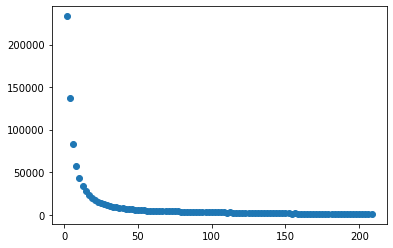

In [40]:
thresholds = []
rates = []
points = []
for i in sorted(glob.glob(f'/fefs/aswg/workspace/mykhailo.dalchenko/trigger_studies/prod5_no_nsb_asum_thr_10_1000_step_10_high_stat/output/effective_area//rate_threshold*.txt')):
    with open(i, 'r') as f:
        vals = f.readline().split(' ')
        thresholds.append(int(vals[1][:-1])/4.8)
        rates.append(float(vals[4]))
        points.append((int(vals[1][:-1])/4.8, float(vals[4])))

#plt.plot(thresholds, rates, 'bo', linestyle='None', markersize = 3.0)
plt.scatter(*zip(*points))

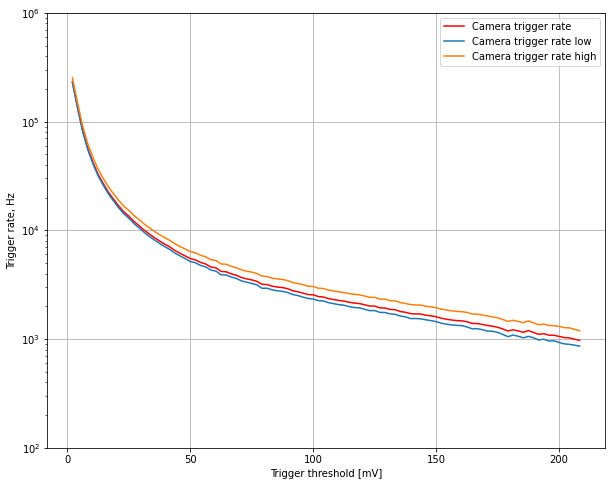

In [41]:
df_rates=df_rates.sort_values('threshold')
fig = plt.figure(figsize=(10,8))
plt.plot(df_rates['threshold']/4.8, df_rates['rate'], 'r-', label="Camera trigger rate")

plt.plot(df_rates['threshold']/4.8, df_rates['rate_low'], label="Camera trigger rate low")
plt.plot(df_rates['threshold']/4.8, df_rates['rate_high'], label="Camera trigger rate high")



plt.xlabel('Trigger threshold [mV]')
plt.ylabel('Trigger rate, Hz')
plt.ylim((pow(10, 2), pow(10, 6)))
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()

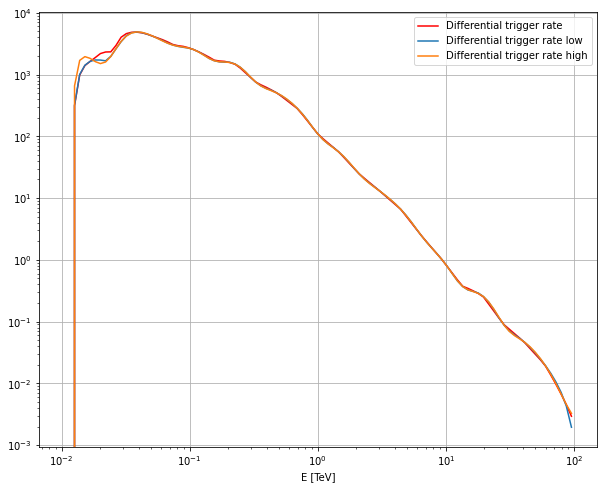

In [42]:
fig = plt.figure(figsize=(10,8))
differential_rates = [differential_rate(x, eff_area_interpolated_1) for x in energy_centers_smooth]
differential_rates_low = [differential_rate(x, eff_area_interpolated_2) for x in energy_centers_smooth]
differential_rates_high = [differential_rate(x, eff_area_interpolated_3) for x in energy_centers_smooth]
plt.plot(energy_centers_smooth, differential_rates, 'r-', label="Differential trigger rate")
plt.plot(energy_centers_smooth, differential_rates_low, label="Differential trigger rate low")
plt.plot(energy_centers_smooth, differential_rates_high, label="Differential trigger rate high")


plt.xlabel('E [TeV]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()

In [2]:
import numpy as np
import astropy.units as u
from pyirf.spectral import (
    IRFDOC_PROTON_SPECTRUM, PDG_ALL_PARTICLE, calculate_event_weights, PowerLaw
)
from pyirf.simulations import SimulatedEventsInfo


simulated_events = SimulatedEventsInfo(
    n_showers=1000,
    energy_min=100 * u.GeV,
    energy_max=100 * u.TeV,
    max_impact=1 * u.km,
    spectral_index=-2,
    viewcone=10 * u.deg,
)


# transform simulation info into a proper spectrum for the given observation time
simulated_spectrum = PowerLaw.from_simulation(simulated_events, obstime=1 * u.s)

energies = np.geomspace(100 * u.GeV, 100 * u.TeV, 500)

# weights are event numbers for 1 second of observation time
weights = calculate_event_weights(
    energies,
    target_spectrum=PDG_ALL_PARTICLE,  # or use the PDG_ALL_PARTICLE
    simulated_spectrum=simulated_spectrum,
)

print(weights)


[2146.790905   2126.08845829 2105.58565437 2085.28056798 2065.17129244
 2045.25593948 2025.532639   2005.99953896 1986.65480518 1967.49662115
 1948.5231879  1929.73272379 1911.12346437 1892.69366221 1874.44158671
 1856.36552399 1838.46377667 1820.73466376 1803.17652046 1785.78769804
 1768.56656367 1751.51150026 1734.6209063  1717.89319575 1701.32679786
 1684.92015701 1668.67173259 1652.57999886 1636.64344479 1620.86057389
 1605.22990415 1589.74996781 1574.41931129 1559.23649502 1544.20009331
 1529.30869422 1514.56089942 1499.95532408 1485.49059671 1471.16535906
 1456.97826596 1442.92798522 1429.01319751 1415.23259619 1401.58488727
 1388.06878919 1374.68303277 1361.42636108 1348.29752929 1335.29530458
 1322.41846603 1309.66580449 1297.03612246 1284.52823399 1272.14096459
 1259.87315105 1247.72364143 1235.69129485 1223.77498148 1211.97358234
 1200.28598927 1188.7111048  1177.24784201 1165.89512449 1154.65188622
 1143.51707142 1132.48963453 1121.56854005 1110.75276247 1100.04128619
 1089.

In [46]:
test2 = pickle.load(open('../corsika_dat_asum_threshold_1000.pickle', 'rb'))

In [47]:
df2 = test2['data']
df2.head()

Particle ID   Azimuth  Altitude  First Interaction Height            X  \
0          101  3.160836  1.141193              36252.238281   541.135742   
1          101  3.160836  1.141193              36252.238281 -1329.029175   
2          101  3.160836  1.141193              36252.238281   -86.656761   
3          101  3.160836  1.141193              36252.238281   389.945282   
4          101  3.160836  1.141193              36252.238281   534.422852   

             Y    Energy Triggered Telescopes Triggered Sectors  
0 -1267.192505  0.013761                 None              None  
1   260.096710  0.013761                 None              None  
2  -546.180481  0.013761                 None              None  
3   893.599609  0.013761                 None              None  
4   823.842346  0.013761                 None              None

In [48]:
df2.dropna().head()

Particle ID   Azimuth  Altitude  First Interaction Height         X  \
80          101  3.023525  1.185483              16646.994141 -34.90564   

             Y    Energy Triggered Telescopes              Triggered Sectors  
80  217.475235  0.189086                  [1]  {1: [57, 118, 123, 182, 183]}

In [3]:
test_energies = np.geomspace(1 * u.GeV, 10 * u.GeV, 9)

In [9]:
test_arr = np.asarray([2,3,4])

In [13]:
dig = np.digitize(test_arr * u.GeV, test_energies)

In [11]:
test_energies

<Quantity [ 1.        ,  1.33352143,  1.77827941,  2.37137371,  3.16227766,
            4.21696503,  5.62341325,  7.49894209, 10.        ] GeV>

In [12]:
test_arr

array([2, 3, 4])

In [14]:
dig

array([3, 4, 5])